In [1078]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [1079]:
# Connect to your database.
conn = sqlite3.connect('/home/sumkin/sumkin-trading/data/trades.db')
conn.row_factory = sqlite3.Row
cursor = conn.cursor()

# Number of trades.
cursor.execute("SELECT COUNT(*) FROM cointegration_pair_trades")
num_trades = cursor.fetchone()[0]

# Number of completed trades.
cursor.execute("SELECT COUNT(*) FROM cointegration_pair_trades WHERE active = 0")
num_completed_trades = cursor.fetchone()[0]

# Number of wins.
cursor.execute("SELECT COUNT(*) FROM cointegration_pair_trades WHERE active = 0 and return_pct > 0")
num_win_trades = cursor.fetchone()[0]

# Win rate.
win_rate = num_win_trades / num_completed_trades

# Average return in pct.
cursor.execute("SELECT AVG(return_pct) FROM cointegration_pair_trades WHERE active = 0")
avg_return = cursor.fetchone()[0]

# Averate return.
cursor.execute("SELECT SUM(return_pct) FROM cointegration_pair_trades WHERE active = 0")
sum_return = cursor.fetchone()[0]

print("num_trades = {}".format(num_trades))
print("num_completed_trades = {}".format(num_completed_trades))
print("num_win_trades = {}".format(num_win_trades))
print("win_rate = {}".format(win_rate))
print("avg_return = {}".format(avg_return))
print("sum_return = {}".format(sum_return))

num_trades = 142
num_completed_trades = 91
num_win_trades = 57
win_rate = 0.6263736263736264
avg_return = 0.17844484643445038
sum_return = 16.238481025534984


In [1080]:
df = pd.read_sql_query("SELECT * FROM cointegration_pair_trades", conn)
df["enter_dt"] = pd.to_datetime(df["enter_dt"])
df["exit_dt"] = pd.to_datetime(df["exit_dt"])
df["trade_length"] = (df["exit_dt"] - df["enter_dt"]).dt.total_seconds() / 60
df.sort_values("enter_dt", ascending=True, inplace=True)
df[df["active"] == 1].head(5)

,id,symb1,symb2,hedge,coeff,sigma,enter_dt,exit_dt,side,amnt,return_pct,return,active,p1_enter,p2_enter,p1_exit,p2_exit,trade_length
17,720,PF_TIAUSD,PF_WIFUSD,0.467691,0.042344,0.009864,2025-10-13 00:36:04,NaT,BUY,0.937734,NaN,NaN,1,1.0664,0.56180,NaN,NaN,NaN
12,715,PF_IMXUSD,PF_SUSD,0.486610,-0.062608,0.010060,2025-10-13 00:36:04,NaT,SELL,1.731302,NaN,NaN,1,0.5776,0.20080,NaN,NaN,NaN
4,707,PF_KAVAUSD,PF_STRKUSD,0.292654,0.065399,0.005831,2025-10-13 00:36:04,NaT,BUY,5.205622,NaN,NaN,1,0.1921,0.13344,NaN,NaN,NaN
10,713,PF_IMXUSD,PF_POLUSD,0.239900,0.070818,0.004833,2025-10-13 00:36:04,NaT,SELL,1.731302,NaN,NaN,1,0.5776,0.19968,NaN,NaN,NaN
26,729,PF_AAVEUSD,PF_COMPUSD,0.222519,-19.540474,1.017551,2025-10-13 00:40:34,NaT,SELL,0.004002,NaN,NaN,1,249.9000,34.52600,NaN,NaN,NaN


# Return percentage distribution

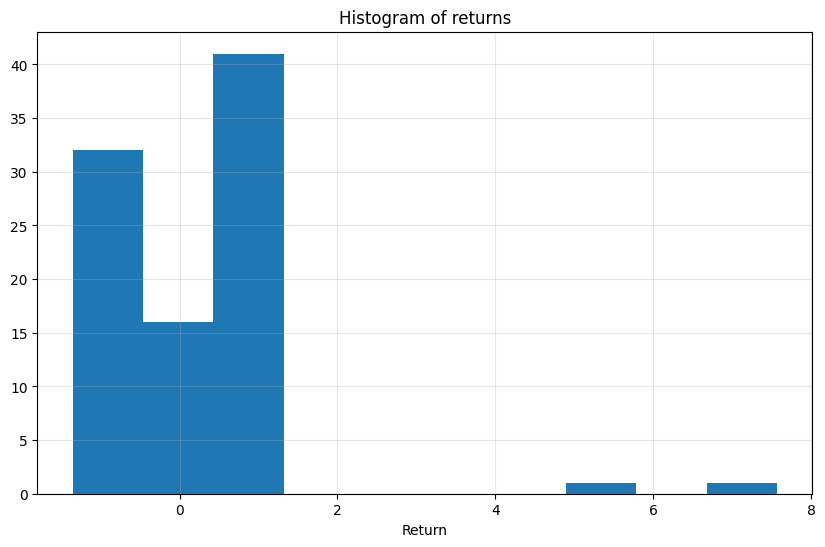

In [1081]:
plt.figure(figsize=(10, 6))
plt.hist(df[df["active"] == 0]["return_pct"])
plt.xlabel("Return")
plt.title("Histogram of returns")
plt.grid(True, alpha=0.3)
plt.show()

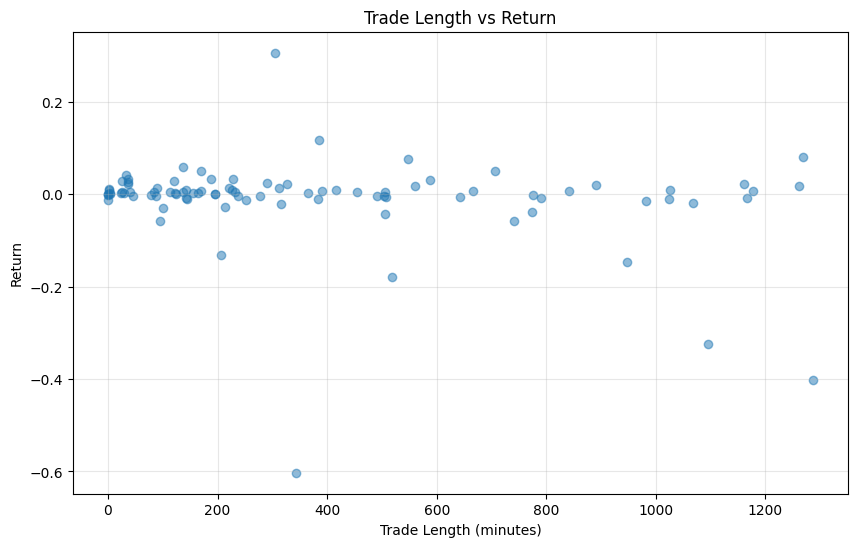

In [1082]:
plt.figure(figsize=(10, 6))
plt.scatter(df["trade_length"], df["return"], alpha=0.5)
plt.xlabel("Trade Length (minutes)")
plt.ylabel("Return")
plt.title("Trade Length vs Return")
plt.grid(True, alpha=0.3)
plt.show()